In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np 
import pandas as pd

### Structuring The Data

In [35]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

Data downloaded and read into a dataframe!
data dimensions: (195, 38)


In [4]:
mpl.style.use('ggplot') # optional: for ggplot-like style

Step 1: Gather data. 

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1. **Split:** Splitting the data into groups based on some criteria.
2. **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3. **Combine:** Combining the results into a data structure.

In [8]:
df_continents=df_can.groupby('Continent',axis=0).sum()

In [32]:
type(df_continents)

pandas.core.frame.DataFrame

Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:
- `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
- `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

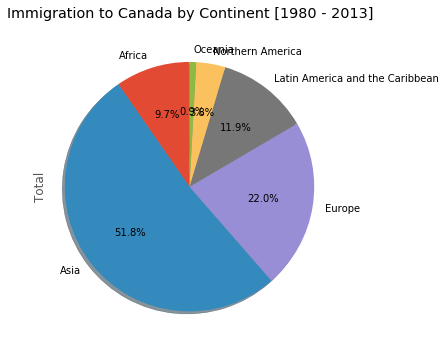

In [11]:
%matplotlib inline
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

* Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
* Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
* Pass in a custom set of colors for continents by passing in `colors` parameter.
* **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.


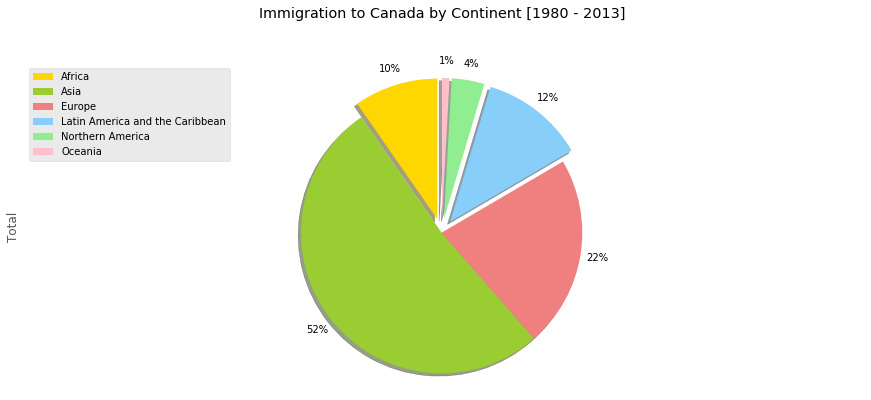

In [31]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.
df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%.f%%',
                            startangle=90,
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()

# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">

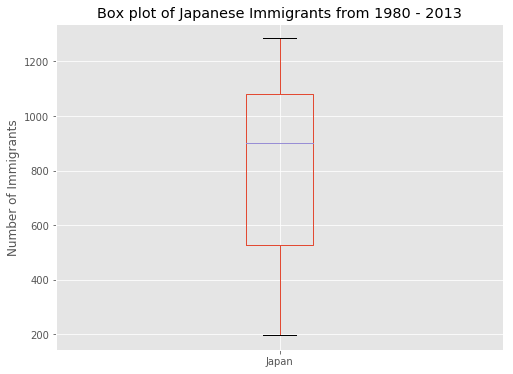

In [43]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.plot(kind='box',figsize=(8,6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [46]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Text(0.5, 1.0, 'China VS India')

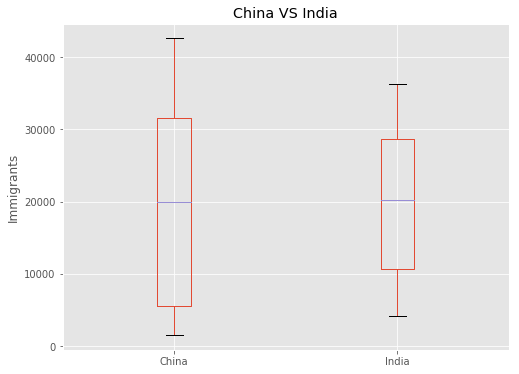

In [55]:
df_ci=df_can.loc[['China','India'],years].transpose()
df_ci.plot(kind='box',figsize=(8,6))
plt.ylabel('Immigrants')
plt.title('China VS India')

In [53]:
df_ci.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


## Horizontal Box Plots


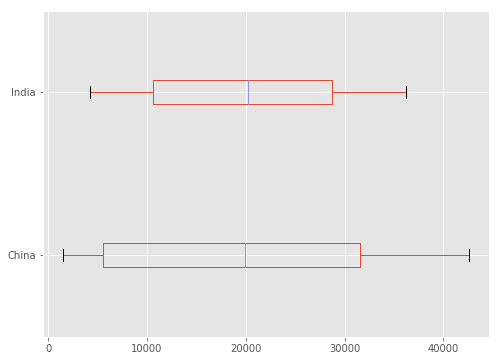

In [57]:
df_ci.plot(kind='box',figsize=(8,6),vert=False)
plt.show()

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**. 

Typical syntax is : <br>
```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```
Where
- `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,  
- `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` * `ncols` as shown below.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig5Subplots_V2.png" width=500 align="center">

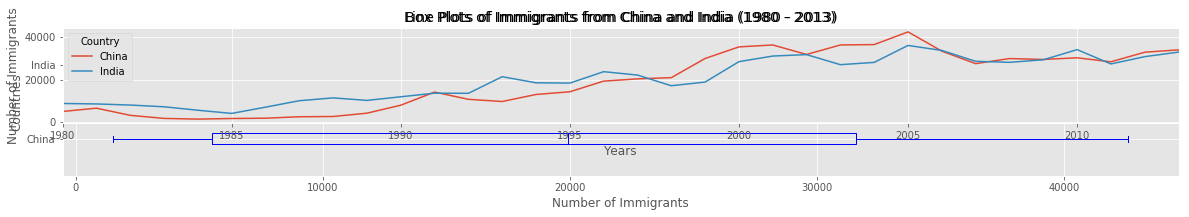

In [77]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(3, 1, 1) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
# Subplot 1: Box plot
df_ci.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_ci.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()